| Parameter    | Units                 | Physical Role                                        |
|--------------|-----------------------|------------------------------------------------------|
| $$ \mu $$    | $$\text{Pa}\cdot\text{s}$$ | Dynamic viscosity of blood                           |
| $$ k_t $$    | $$ \text{m}^2 $$      | 3D tissue permeability                               |
| $$ k_v $$    | $$ \text{m}^2 $$      | Axial permeability along the vessel                  |
| $$ \gamma $$ | $$ \text{m}/(\text{Pa}\cdot\text{s}) $$ | Vessel wall permeability coefficient (coupling tissue & vessel) |
| $$ \gamma_R $$ | $$ \text{m}/(\text{Pa}\cdot\text{s}) $$ | Boundary outflow (Robin) permeability                 |
| $$ \gamma_a $$ | $$\text{m}$$                    | Terminal vessel coupling length scale (hydraulic conductance at end) |

In [1]:
%%capture
!pip install numpy==1.26.4
!pip install ipywidgets vtk meshio pyvista Rtree

In [2]:
import sys, os, importlib

WORK_PATH = "/root/3d-1d"
MODULES_PATH = os.path.join(WORK_PATH, 'modules')

sys.path.append(MODULES_PATH)

In [3]:
from graphnics import FenicsGraph

TEST_GRAPH_NODES = {
    0: [0.000, 0.020, 0.015],   # A
    1: [0.010, 0.020, 0.015],   # B
    2: [0.022, 0.013, 0.015],   # C
    3: [0.022, 0.028, 0.015],   # D
    4: [0.015, 0.005, 0.015],   # E
    5: [0.015, 0.035, 0.015],   # F
    6: [0.038, 0.005, 0.015],   # G
    7: [0.038, 0.035, 0.015]    # H
}

TEST_GRAPH_EDGES = [
    (0, 1, 0.004),  # AB
    (1, 2, 0.003),  # BC
    (1, 3, 0.003),  # BD
    (2, 4, 0.002),  # CE
    (2, 6, 0.003),  # CG
    (3, 5, 0.002),  # DF
    (3, 7, 0.003)   # DH
]

TEST_GRAPH = FenicsGraph()

for node, pos in TEST_GRAPH_NODES.items():
    TEST_GRAPH.add_node(node, pos=pos)

for u, v, radius in TEST_GRAPH_EDGES:
    TEST_GRAPH.add_edge(u, v, radius=radius)

/usr/local/lib/python3.11/dist-packages/block/__init__.py:15: UserWarning: The cbc.block repository has moved to https://github.com/blocknics/cbc.block
  warnings.warn('The cbc.block repository has moved to https://github.com/blocknics/cbc.block', UserWarning)


Missing HsMG for fract norm computing


In [4]:
import MeasureCreator
importlib.reload(MeasureCreator)

FACE_XZERO = MeasureCreator.XAxisPlane(0.0)
TEST_MESH = MeasureCreator.MeasureCreator(
    G = TEST_GRAPH,
    Lambda_inlet = [0],
    Omega_sink = FACE_XZERO,
    Omega_bounds_dim = [[0,0,0],[0.06, 0.06, 0.06]]
)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


In [5]:
import FEMSink
importlib.reload(FEMSink)

TEST = FEMSink.FEMSink(
    mc = TEST_MESH,
    gamma = 100,
    gamma_R = 1.0e-5,
    gamma_v = 1.0e-5,
    gamma_a = 1.0e-5,
    mu = 1.0e-3, # Viscosity
    k_t = 1.0e-10, # Tissue permeability in 3D
    k_v = 1.5e-11, # Vessel permeability in 1D
    P_in = 100.0 * 133.322, # 100 mmHg
    p_cvp = 1.0 * 133.322, # 1 mmHg
    Lambda_inlet = [0],
    Omega_sink = FACE_XZERO
)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 2653.99it/s]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FF

In [12]:
import FEMSinkVelo
importlib.reload(FEMSinkVelo)

VTEST = FEMSinkVelo.FEMSinkVelo(
    mc = TEST_MESH,
    gamma = 200,
    gamma_R = 8.0e-3,
    gamma_v = 2.0e-1,
    gamma_a = 450,
    mu = 1.0e-3, # Viscosity
    k_t = 1.0e-10, # Tissue permeability in 3D
    k_v = 7.6e-9, # Vessel permeability in 1D
    P_in = 100.0 * 133.322, # 100 mmHg
    p_cvp = 1.0 * 133.322, # 1 mmHg
    Lambda_inlet = [0],
    Omega_sink = FACE_XZERO
)

Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 2344.20it/s]


Applied BC! Non-empty list


Node Pressure Data:
Node 0: Pressure 13332.2
Node 113: Pressure 13613.7
Node 57: Pressure 13423.5
Node 114: Pressure 12933.6
Node 29: Pressure 12414.6
Node 116: Pressure 11874.3
Node 58: Pressure 11322.3
Node 115: Pressure 10770.3
Node 15: Pressure 10217.6
Node 119: Pressure 9667.3
Node 60: Pressure 9146.7
Node 120: Pressure 8626.4
Node 30: Pressure 8114.4
Node 118: Pressure 7736.2
Node 59: Pressure 7500.4
Node 117: Pressure 7267.9
Node 8: Pressure 7022.2
Node 125: Pressure 6771.0
Node 63: Pressure 6517.7
Node 126: Pressure 6264.2
Node 32: Pressure 6010.4
Node 128: Pressure 5757.6
Node 64: Pressure 5512.4
Node 127: Pressure 5267.6
Node 16: Pressure 5027.2
Node 123: Pressure 4835.5
Node 62: Pressure 4700.8
Node 124: Pressure 4573.6
Node 31: Pressure 4443.2
Node 122: Pressure 4312.1
Node 61: Pressure 4180.4
Node 121: Pressure 4048.5
Node 1: Pressure 3916.7
Node 145: Pressure 3773.3
Node 73: Pressure 3647.4
Node 146: Pressure 3525.8
Node 37: Pressure 3405.4
Node 148: Pressure 3282.2
Node 

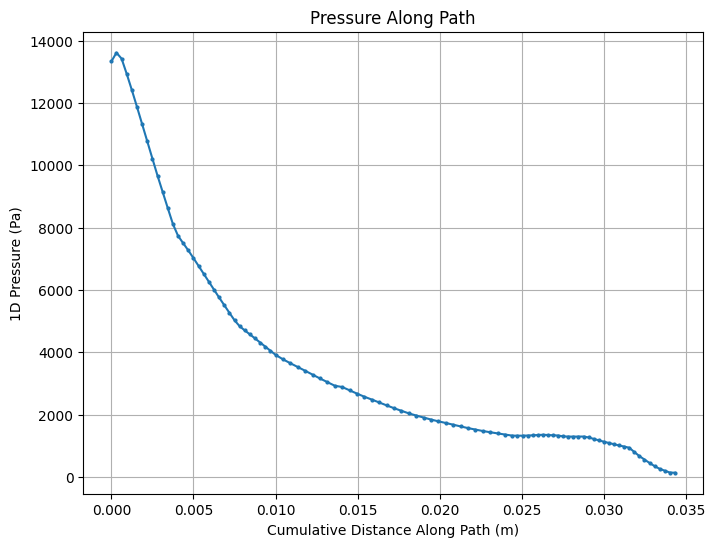

In [7]:
import Visualizer
importlib.reload(Visualizer)
Visualizer.plot_path_pressure(VTEST.uh1d, TEST_GRAPH, [0, 1, 3, 5])

In [17]:
import FEMSinkCubeFlux
import numpy as np
importlib.reload(FEMSinkCubeFlux)

TEST_GRAPH_CALIB = TEST_MESH.G_ref

CUBE_TEST = FEMSinkCubeFlux.FEMSinkCubeFlux(
    mc = TEST_MESH,
    gamma = 200,
    gamma_R = 8.0e-3,
    gamma_v = 2.0e-1,
    gamma_a = 1.0e-5,
    mu = 1.0e-3, # Viscosity
    k_t = 1.0e-10, # Tissue permeability in 3D
    k_v = 1.3e-11, # Vessel permeability in 1D
    P_in = 100.0 * 133.322, # 100 mmHg
    p_cvp = 1.0 * 133.322, # 1 mmHg
    Lambda_inlet = [0],
    Omega_sink = FACE_XZERO,
    upper_cube_bounds = [np.array(TEST_GRAPH_CALIB.nodes[7]['pos']) - np.array([0.01, 0.01, 0.01]),
                         np.array(TEST_GRAPH_CALIB.nodes[7]['pos']) + np.array([0.01, 0.01, 0.01])],
    lower_cube_bounds = [[0,0,0],[0.02, 0.02, 0.02]]
)

Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 2703.36it/s]


Applied BC! Non-empty list


Lower Cube Bounds: [[0, 0, 0], [0.02, 0.02, 0.02]]
Upper Cube Bounds: [array([0.03882667, 0.03478889, 0.02      ]), array([0.05882667, 0.05478889, 0.04      ])]


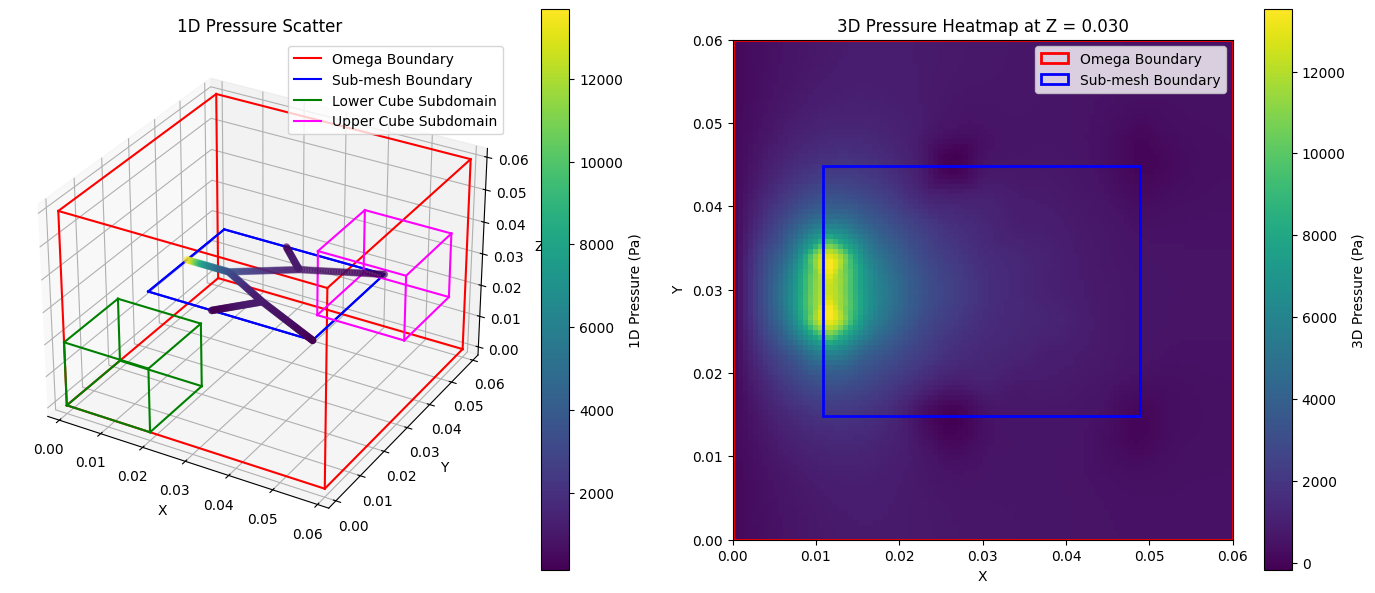

In [18]:
importlib.reload(Visualizer)
cube_lower_bounds = CUBE_TEST.lower_cube_bounds
cube_upper_bounds = CUBE_TEST.upper_cube_bounds

print("Lower Cube Bounds:", cube_lower_bounds)
print("Upper Cube Bounds:", cube_upper_bounds)

Visualizer.plot_with_boundaries(CUBE_TEST.uh1d, CUBE_TEST.uh3d,
     cube_lower=cube_lower_bounds, 
     cube_upper=cube_upper_bounds)

In [19]:
print(CUBE_TEST.compute_lower_cube_flux())
print(CUBE_TEST.compute_upper_cube_flux())

4.2786104358829704e-07
1.5580589390093043e-05


In [22]:
import datetime
import pytz

cst = pytz.timezone("America/Chicago")
now = datetime.datetime.now(cst)
timestamp = now.strftime("%Y%m%d_%H%M")
filename = f"output_{timestamp}"

SAVE_PATH = os.path.join(WORK_PATH, "export", filename)
CUBE_TEST.save_vtk(SAVE_PATH)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import FEMSinkCubeFlux
import importlib
import time

importlib.reload(FEMSinkCubeFlux)

def run_sweep(param_name, values, defaults):
    fluxes = []
    for val in values:
        params = defaults.copy()
        params[param_name] = val
        cube_test = FEMSinkCubeFlux.FEMSinkCubeFlux(**params)
        flux = cube_test.compute_upper_cube_flux()
        fluxes.append(flux)
    return fluxes

def vary_parameters_and_plot(num_points=50):
    common_params = {
        'mc': TEST_MESH,
        'gamma': 200,             # Default value.
        'gamma_R': 8.0e-3,        # Default value.
        'gamma_v': 2.0e-1,
        'gamma_a': 450,
        'mu': 1.0e-3,
        'k_t': 1.0e-10,           # Default value.
        'k_v': 7.6e-9,
        'P_in': 100.0 * 133.322,   # 100 mmHg.
        'p_cvp': 1.0 * 133.322,    # 1 mmHg.
        'Lambda_inlet': [0],
        'Omega_sink': FACE_XZERO,
        'upper_cube_bounds': [
            np.array(TEST_GRAPH_CALIB.nodes[7]['pos']) - np.array([0.01, 0.01, 0.01]),
            np.array(TEST_GRAPH_CALIB.nodes[7]['pos']) + np.array([0.01, 0.01, 0.01])
        ],
        'lower_cube_bounds': [[0, 0, 0], [0.02, 0.02, 0.02]]
    }
    
    # Sweep 1: Varying k_t.
    kt_values = np.logspace(-15, 3, num_points)
    fluxes_kt = run_sweep('k_t', kt_values, common_params)
    
    # Sweep 2: Varying gamma.
    gamma_values = np.logspace(-15, 3, num_points)
    fluxes_gamma = run_sweep('gamma', gamma_values, common_params)
    
    # Sweep 3: Varying gamma_R.
    gamma_R_values = np.logspace(-15, 3, num_points)
    fluxes_gamma_R = run_sweep('gamma_R', gamma_R_values, common_params)
    
    fig, axes = plt.subplots(3, 1, figsize=(10, 18))
    
    axes[0].semilogx(kt_values, fluxes_kt, marker='o', linestyle='-')
    axes[0].set_xlabel("Tissue Permeability k_t")
    axes[0].set_ylabel("Upper Cube Flux")
    axes[0].set_title("Upper Cube Flux vs. Tissue Permeability k_t")
    axes[0].grid(True, which="both", ls="--")
    
    axes[1].plot(gamma_values, fluxes_gamma, marker='o', linestyle='-')
    axes[1].set_xlabel("Gamma")
    axes[1].set_ylabel("Upper Cube Flux")
    axes[1].set_title("Upper Cube Flux vs. Gamma")
    axes[1].grid(True, ls="--")
    
    axes[2].semilogx(gamma_R_values, fluxes_gamma_R, marker='o', linestyle='-')
    axes[2].set_xlabel("Gamma_R")
    axes[2].set_ylabel("Upper Cube Flux")
    axes[2].set_title("Upper Cube Flux vs. Gamma_R")
    axes[2].grid(True, which="both", ls="--")
    
    plt.tight_layout()
    plt.show()

vary_parameters_and_plot(num_points=50)